# Importando dependências

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from scipy.stats import shapiro
import seaborn as sns

# Importando o dataset

In [2]:
df = pd.read_csv('datasets/brazil_covid19.csv')
df.head(30)

,date,hour,state,suspects,refuses,cases,deaths
0,2020-01-30,16:00,Minas Gerais,1,0,0,0
1,2020-01-30,16:00,Rio de Janeiro,1,0,0,0
2,2020-01-30,16:00,Santa Catarina,0,2,0,0
3,2020-01-30,16:00,São Paulo,3,1,0,0
4,2020-01-30,16:00,Rio Grande do Sul,2,2,0,0
5,2020-01-30,16:00,Paraná,1,1,0,0
6,2020-01-30,16:00,Ceará,1,0,0,0
7,2020-01-31,12:00,Ceará,1,0,0,0
8,2020-01-31,12:00,Minas Gerais,1,0,0,0
9,2020-01-31,12:00,Rio de Janeiro,0,1,0,0


# Tratando os dados

In [3]:
df = df.drop(columns=['hour'])
df.head(60)

,date,state,suspects,refuses,cases,deaths
0,2020-01-30,Minas Gerais,1,0,0,0
1,2020-01-30,Rio de Janeiro,1,0,0,0
2,2020-01-30,Santa Catarina,0,2,0,0
3,2020-01-30,São Paulo,3,1,0,0
4,2020-01-30,Rio Grande do Sul,2,2,0,0
5,2020-01-30,Paraná,1,1,0,0
6,2020-01-30,Ceará,1,0,0,0
7,2020-01-31,Ceará,1,0,0,0
8,2020-01-31,Minas Gerais,1,0,0,0
9,2020-01-31,Rio de Janeiro,0,1,0,0


In [4]:
df = df.replace([np.inf, -np.inf], np.nan).dropna(how="any")
df

,date,state,suspects,refuses,cases,deaths
0,2020-01-30,Minas Gerais,1,0,0,0
1,2020-01-30,Rio de Janeiro,1,0,0,0
2,2020-01-30,Santa Catarina,0,2,0,0
3,2020-01-30,São Paulo,3,1,0,0
4,2020-01-30,Rio Grande do Sul,2,2,0,0
...,...,...,...,...,...,...
1003,2020-03-30,Roraima,0,0,16,0
1004,2020-03-30,Santa Catarina,0,0,197,1
1005,2020-03-30,São Paulo,0,0,1517,113
1006,2020-03-30,Sergipe,0,0,16,0


In [5]:
nan = df[df.isna().any(axis=1)]
nan

,date,state,suspects,refuses,cases,deaths


In [6]:
total_dup = df.duplicated().sum()
total_dup

15

In [7]:
df = df.drop_duplicates()
df

,date,state,suspects,refuses,cases,deaths
0,2020-01-30,Minas Gerais,1,0,0,0
1,2020-01-30,Rio de Janeiro,1,0,0,0
2,2020-01-30,Santa Catarina,0,2,0,0
3,2020-01-30,São Paulo,3,1,0,0
4,2020-01-30,Rio Grande do Sul,2,2,0,0
...,...,...,...,...,...,...
1003,2020-03-30,Roraima,0,0,16,0
1004,2020-03-30,Santa Catarina,0,0,197,1
1005,2020-03-30,São Paulo,0,0,1517,113
1006,2020-03-30,Sergipe,0,0,16,0


In [8]:
total_dup = df.duplicated().sum()
total_dup

0

# Agrupando por dia

In [9]:
df_by_day = df.groupby(['date']).sum()
df_by_day

,suspects,refuses,deaths
date,,,
2020-01-30,9,6,0
2020-01-31,13,9,0
2020-02-01,16,10,0
2020-02-02,16,10,0
2020-02-03,14,13,0
2020-02-04,13,16,0
2020-02-05,11,21,0
2020-02-06,9,24,0
2020-02-07,8,26,0


# Definindo x e y

In [10]:
array = df.to_numpy()
array

array([['2020-01-30', 'Minas Gerais', 1, 0, '0', 0],
       ['2020-01-30', 'Rio de Janeiro', 1, 0, '0', 0],
       ['2020-01-30', 'Santa Catarina', 0, 2, '0', 0],
       ...,
       ['2020-03-30', 'São Paulo', 0, 0, '1517', 113],
       ['2020-03-30', 'Sergipe', 0, 0, '16', 0],
       ['2020-03-30', 'Tocantins', 0, 0, '10', 0]], dtype=object)

In [11]:
x = pd.DataFrame(df_by_day.index).index.to_numpy() + 1
x

array([ 1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16, 17,
       18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34,
       35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50, 51,
       52, 53, 54, 55, 56, 57, 58, 59, 60], dtype=int64)

In [20]:
y = df_by_day['deaths'].to_numpy()
y

array([  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
         0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
         0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
         0,   0,   0,   0,   0,   0,   0,   1,   4,   7,  12,  18,  25,
        34,  46,  57,  77,  92, 114, 136, 159], dtype=int64)

# Média

In [22]:
var_y = np.mean(y)
print(f"Var(y): {var_y}")

Var(y): 13.033333333333333


# Desvio Padrão

In [14]:
std_y = np.std(y)
print(f"STD(y): {std_y}")

STD(y): 33.82650177334663


# Variância

In [15]:
var_y = np.var(y)
print(f"Var(y): {var_y}")

Var(y): 1144.2322222222224


# Histograma

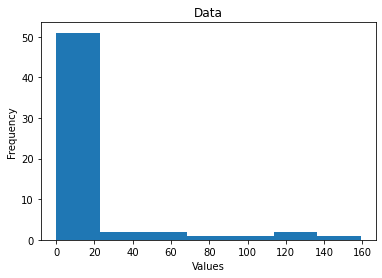

In [16]:
plt.hist(y, bins = 'auto')
plt.title('Data')
plt.ylabel('Frequency')
plt.xlabel('Values')
plt.show()

# Correlação

In [17]:
np.corrcoef(x, y)

array([[1.        , 0.58898423],
       [0.58898423, 1.        ]])

# Heatmap

<AxesSubplot:>

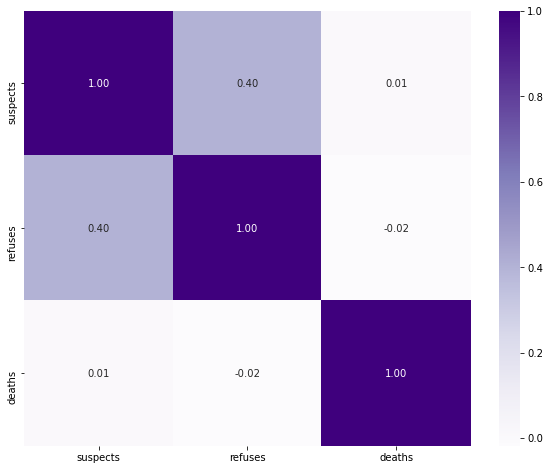

In [18]:
corr = df.corr()
plt.figure(figsize=(10, 8))
sns.heatmap(corr, annot=True, fmt='.2f', cmap='Purples')